In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# https://docs.opencv.org/trunk/da/d54/group__imgproc__transform.html

# https://docs.opencv.org/trunk/d4/d35/samples_2cpp_2polar_transforms_8cpp-example.html#a16

# https://python-forum.io/Thread-Image-conversion-form-cartesian-to-polar-and-back-to-cartesian

121.0 (1035, 800, 3)


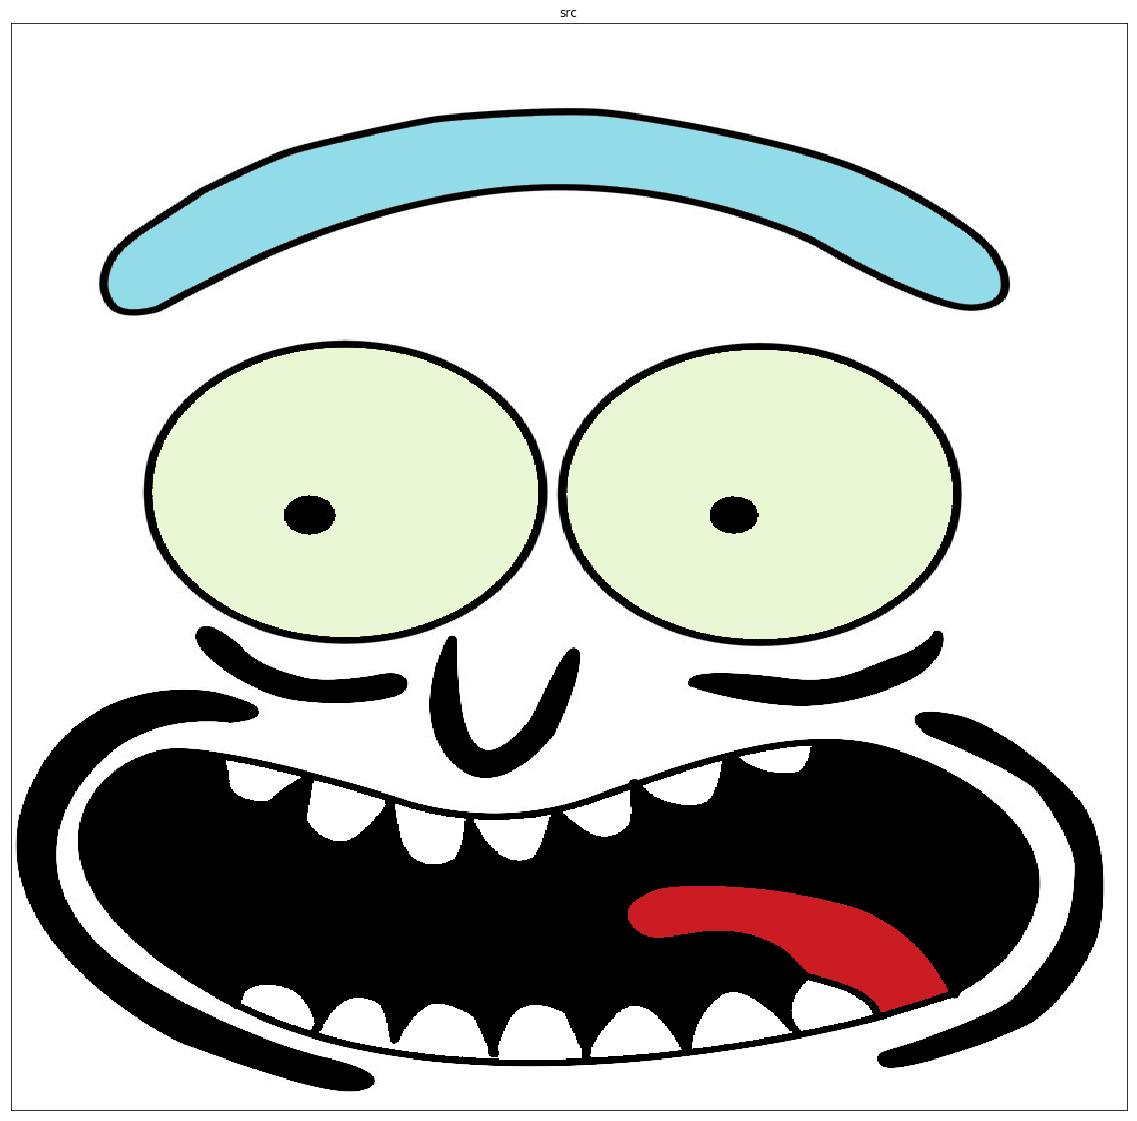

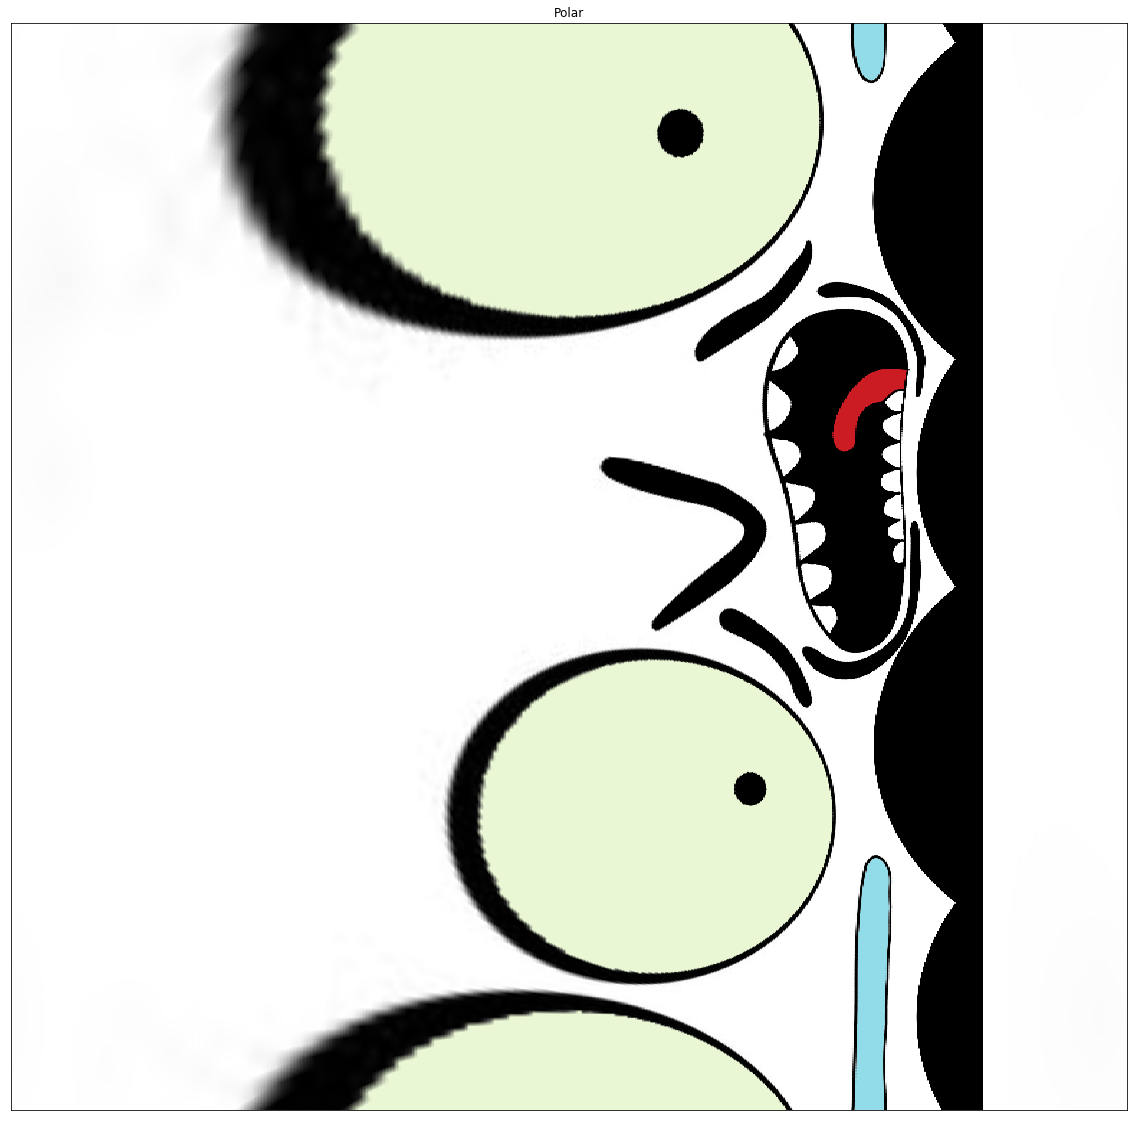

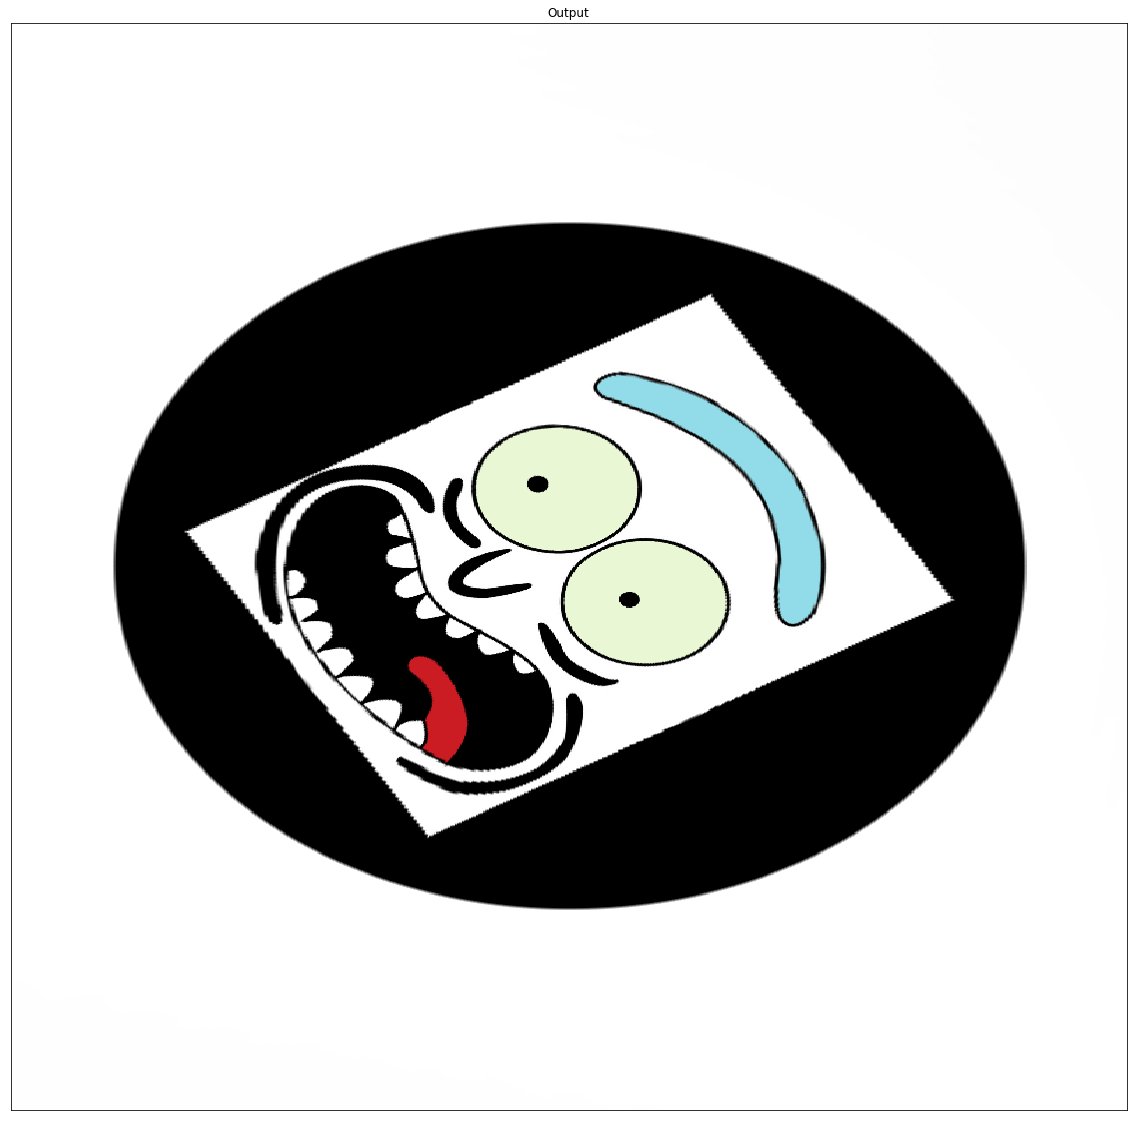

In [147]:
src = cv.imread('/Users/kolsha/Pictures/i_m_pumpkin_rick__stencil_by_batnamz-dbrxwip.png')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

rows, cols, ch = src.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
M = 121.0
 
#polar_img = cv.logPolar(src, (crow, ccol), M)

img64_float = np.copy(src)#.astype(np.float64)
 
center = (ccol, crow)

#center = (0, 0)

#M = np.sqrt(((img64_float.shape[0]/2.0)**2.0)+((img64_float.shape[1]/2.0)**2.0)) / 4
print(M, src.shape)

#log_polar_img = cv.logPolar(img64_float, center ,M ,cv.INTER_LINEAR + cv.WARP_FILL_OUTLIERS)
#cv.linearPolar(img64_float,(img64_float.shape[0]/2, img64_float.shape[1]/2),Mvalue,cv.WARP_FILL_OUTLIERS)
 
#cartisian_image = cv.linearPolar(ploar_image, (img64_float.shape[0]/2, img64_float.shape[1]/2),Mvalue, cv.WARP_INVERSE_MAP)
flags = cv.INTER_LINEAR + cv.WARP_FILL_OUTLIERS + cv.WARP_POLAR_LOG

maxRadius = 1.5 * np.max(center)
#print(maxRadius)
log_polar_img = cv.warpPolar(img64_float, (0,0) ,center, maxRadius, flags)


#log_polar_img = log_polar_img/255

log_polar_img = np.roll(log_polar_img, (cols//2, -100), (0, 1))

#cartisian_image  = cv.logPolar(log_polar_img, center, M, cv.WARP_INVERSE_MAP + cv.INTER_LINEAR + cv.WARP_FILL_OUTLIERS)


cartisian_image = cv.warpPolar(log_polar_img, (cols,rows) ,center, maxRadius, flags + cv.WARP_INVERSE_MAP)


plt.figure(figsize = (20,20))
plt.imshow(src, aspect='auto')
plt.title('src'), plt.xticks([]), plt.yticks([])
plt.show()




plt.figure(figsize = (20,20))
plt.imshow(log_polar_img, aspect='auto')
plt.title('Polar'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize = (20,20))
plt.imshow(cartisian_image, aspect='auto')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()
